In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from scipy.optimize import minimize

ModuleNotFoundError: No module named 'sklearn'

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [2]:

eurusd_results = {
    "Asset": "EURUSD",
    "Net Profit (%)": 13.174,
    "Compounding Annual Return (%)": 1.247,
    "Sharpe Ratio": -0.246,
    "Sortino Ratio": -0.185,
    "Win Rate (%)": 65,
    "Loss Rate (%)": 35,
    "Profit-Loss Ratio": 1.08,
    "Drawdown (%)": 10.8,
    "Beta": 0.013,
    "Alpha": -0.013,
    "Annual Standard Deviation": 0.049,
    "Information Ratio": -0.595
}

btcusd_results = {
    "Asset": "ETHUSD",
    "Net Profit (%)": 367.415,
    "Compounding Annual Return (%)": 16.699,
    "Sharpe Ratio": 0.954,
    "Sortino Ratio": 1.036,
    "Win Rate (%)": 90,
    "Loss Rate (%)": 10,
    "Profit-Loss Ratio": 1.18,
    "Drawdown (%)": 16.2,
    "Beta": 0.054,
    "Alpha": 0.092,
    "Annual Standard Deviation": 0.101,
    "Information Ratio": 0.102
}

ethusd_results = {
    "Asset": "ETHUSD",
    "Net Profit (%)": 234.741,
    "Compounding Annual Return (%)": 12.862,
    "Sharpe Ratio": 0.868,
    "Sortino Ratio": 0.872,
    "Win Rate (%)": 93,
    "Loss Rate (%)": 7,
    "Profit-Loss Ratio": 2.38,
    "Drawdown (%)": 10.9,
    "Beta": 0.064,
    "Alpha": 0.063,
    "Annual Standard Deviation": 0.079,
    "Information Ratio": -0.064
}

xauusd_results = {
    "Asset": "XAUUSD",
    "Net Profit (%)": 50.433,
    "Compounding Annual Return (%)": 4.174,
    "Sharpe Ratio": 0.128,
    "Sortino Ratio": 0.115,
    "Win Rate (%)": 76,
    "Loss Rate (%)": 24,
    "Profit-Loss Ratio": 0.71,
    "Drawdown (%)": 20.7,
    "Beta": 0.004,
    "Alpha": 0.009,
    "Annual Standard Deviation": 0.076,
    "Information Ratio": -0.42
}

ief_results = {
    "Asset": "IEF",
    "Net Profit (%)": 9.225,
    "Compounding Annual Return (%)": 0.888,
    "Sharpe Ratio": -0.349,
    "Sortino Ratio": -0.217,
    "Win Rate (%)": 69,
    "Loss Rate (%)": 31,
    "Profit-Loss Ratio": 1.09,
    "Drawdown (%)": 15.0,
    "Beta": -0.078,
    "Alpha": -0.009,
    "Annual Standard Deviation": 0.043,
    "Information Ratio": -0.574
}

spx500_results = {
    "Asset": "SPX500USD",
    "Net Profit (%)": 100.015,
    "Compounding Annual Return (%)": 7.189,
    "Sharpe Ratio": 0.36,
    "Sortino Ratio": 0.298,
    "Win Rate (%)": 81,
    "Loss Rate (%)": 19,
    "Profit-Loss Ratio": 1.14,
    "Drawdown (%)": 16.3,
    "Beta": 0.289,
    "Alpha": 0.008,
    "Annual Standard Deviation": 0.087,
    "Information Ratio": -0.37
}


📈 **Performance globale du Portefeuille :**
🔹 Net Profit (%): 100.68
🔹 Compounding Annual Return (%): 6.01
🔹 Sharpe Ratio: 0.24
🔹 Sortino Ratio: 0.25
🔹 Win Rate (%): 70.65
🔹 Loss Rate (%): 19.35
🔹 Profit-Loss Ratio: 1.08
🔹 Drawdown (%): 13.82
🔹 Beta: 0.09
🔹 Alpha: 0.02
🔹 Annual Standard Deviation: 0.07
🔹 Information Ratio: -0.32


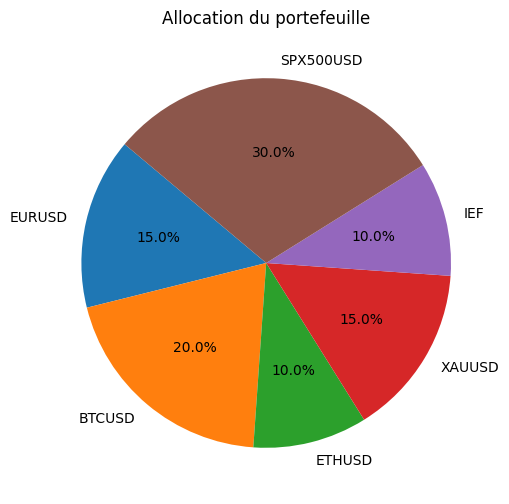

In [6]:
pip install tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# --- Vos dictionnaires de résultats ---
eurusd_results = {
    "Asset": "EURUSD",
    "Net Profit (%)": 13.174,
    "Compounding Annual Return (%)": 1.247,
    "Sharpe Ratio": -0.246,
    "Sortino Ratio": -0.185,
    "Win Rate (%)": 65,
    "Loss Rate (%)": 35,
    "Profit-Loss Ratio": 1.08,
    "Drawdown (%)": 10.8,
    "Beta": 0.013,
    "Alpha": -0.013,
    "Annual Standard Deviation": 0.049,
    "Information Ratio": -0.595
}

btcusd_results = {
    "Asset": "BTCUSD",
    "Net Profit (%)": 367.415,
    "Compounding Annual Return (%)": 16.699,
    "Sharpe Ratio": 0.954,
    "Sortino Ratio": 1.036,
    "Win Rate (%)": 90,
    "Loss Rate (%)": 10,
    "Profit-Loss Ratio": 1.18,
    "Drawdown (%)": 16.2,
    "Beta": 0.054,
    "Alpha": 0.092,
    "Annual Standard Deviation": 0.101,
    "Information Ratio": 0.102
}

ethusd_results = {
    "Asset": "ETHUSD",
    "Net Profit (%)": 234.741,
    "Compounding Annual Return (%)": 12.862,
    "Sharpe Ratio": 0.868,
    "Sortino Ratio": 0.872,
    "Win Rate (%)": 93,
    "Loss Rate (%)": 7,
    "Profit-Loss Ratio": 2.38,
    "Drawdown (%)": 10.9,
    "Beta": 0.064,
    "Alpha": 0.063,
    "Annual Standard Deviation": 0.079,
    "Information Ratio": -0.064
}

xauusd_results = {
    "Asset": "XAUUSD",
    "Net Profit (%)": 50.433,
    "Compounding Annual Return (%)": 4.174,
    "Sharpe Ratio": 0.128,
    "Sortino Ratio": 0.115,
    "Win Rate (%)": 76,
    "Loss Rate (%)": 24,
    "Profit-Loss Ratio": 0.71,
    "Drawdown (%)": 20.7,
    "Beta": 0.004,
    "Alpha": 0.009,
    "Annual Standard Deviation": 0.076,
    "Information Ratio": -0.42
}

ief_results = {
    "Asset": "IEF",
    "Net Profit (%)": 9.225,
    "Compounding Annual Return (%)": 0.888,
    "Sharpe Ratio": -0.349,
    "Sortino Ratio": -0.217,
    "Win Rate (%)": 69,
    "Loss Rate (%)": 31,
    "Profit-Loss Ratio": 1.09,
    "Drawdown (%)": 15.0,
    "Beta": -0.078,
    "Alpha": -0.009,
    "Annual Standard Deviation": 0.043,
    "Information Ratio": -0.574
}

spx500_results = {
    "Asset": "SPX500USD",
    "Net Profit (%)": 100.015,
    "Compounding Annual Return (%)": 7.189,
    "Sharpe Ratio": 0.36,
    "Sortino Ratio": 0.298,
    "Win Rate (%)": 81,
    "Loss Rate (%)": 19,
    "Profit-Loss Ratio": 1.14,
    "Drawdown (%)": 16.3,
    "Beta": 0.289,
    "Alpha": 0.008,
    "Annual Standard Deviation": 0.087,
    "Information Ratio": -0.37
}

# --- Regrouper tous les résultats dans une liste ---
results_list = [
    eurusd_results,
    btcusd_results,
    ethusd_results,
    xauusd_results,
    ief_results,
    spx500_results
]

# --- Créer un DataFrame ---
df = pd.DataFrame(results_list)

df


,Asset,Net Profit (%),Compounding Annual Return (%),Sharpe Ratio,Sortino Ratio,Win Rate (%),Loss Rate (%),Profit-Loss Ratio,Drawdown (%),Beta,Alpha,Annual Standard Deviation,Information Ratio
0,EURUSD,13.174,1.247,-0.246,-0.185,65,35,1.08,10.8,0.013,-0.013,0.049,-0.595
1,BTCUSD,367.415,16.699,0.954,1.036,90,10,1.18,16.2,0.054,0.092,0.101,0.102
2,ETHUSD,234.741,12.862,0.868,0.872,93,7,2.38,10.9,0.064,0.063,0.079,-0.064
3,XAUUSD,50.433,4.174,0.128,0.115,76,24,0.71,20.7,0.004,0.009,0.076,-0.420
4,IEF,9.225,0.888,-0.349,-0.217,69,31,1.09,15.0,-0.078,-0.009,0.043,-0.574
5,SPX500USD,100.015,7.189,0.360,0.298,81,19,1.14,16.3,0.289,0.008,0.087,-0.370
